### 1. For the boston dataset given in HW2, create a heatmap with all the features - 1 point

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

#Needed help to figure out how to make it readable by heatmap:
#https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
boston_data = load_boston(return_X_y=False)
boston_data_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_data_with_target_df = boston_data_df
boston_data_with_target_df["Target"] = boston_data.target


boston_data_with_target_df.head()
# sns.heatmap(data = boston_data_df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2. Apply feature selection on the dataset. Try to find the top k features which improves the score in the next questions - 1 point each

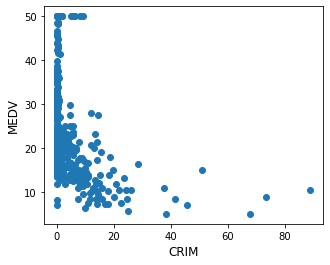

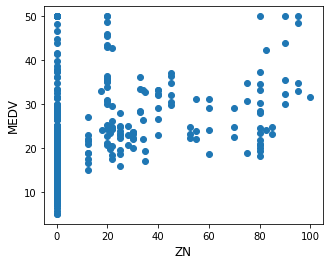

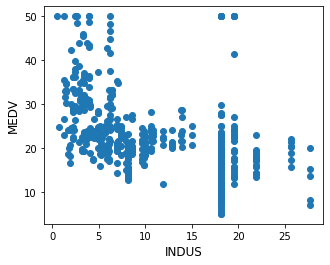

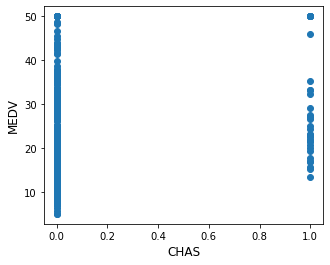

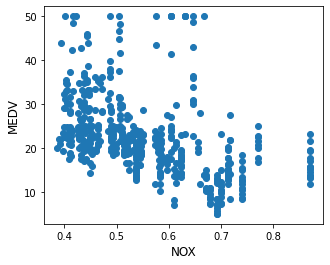

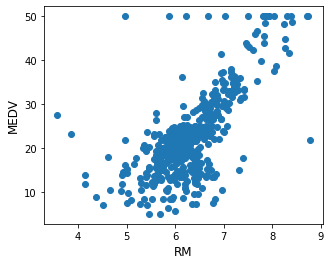

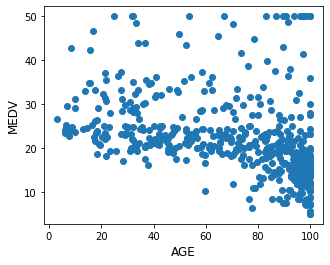

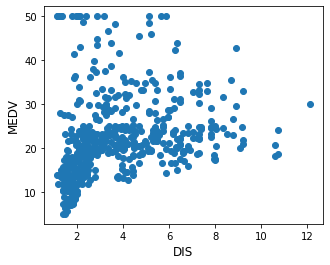

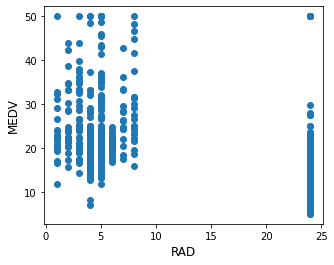

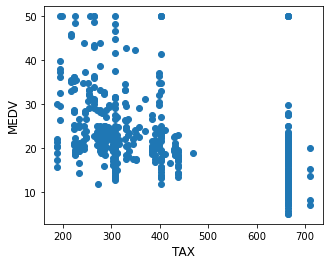

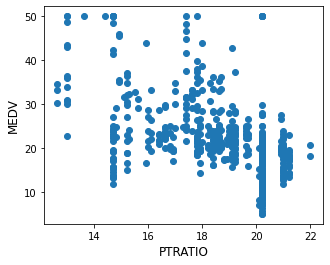

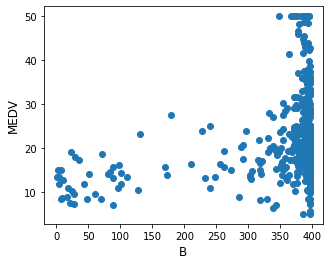

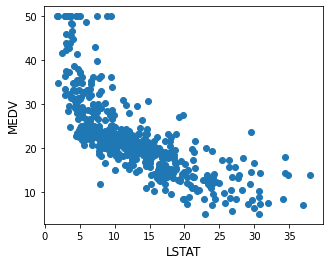

In [202]:
for index, feature_name in enumerate(boston_data.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston_data.data[:, index], boston_data.target)
    plt.ylabel('MEDV', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

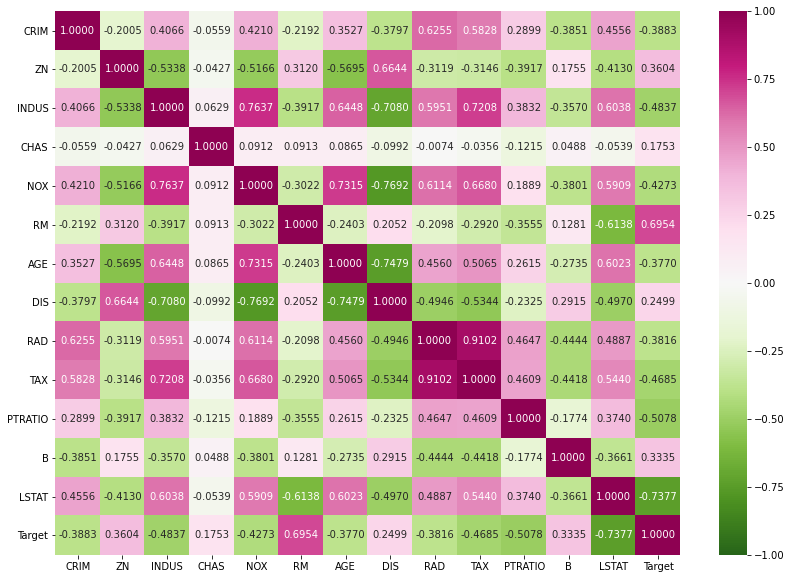

In [214]:
corrs = boston_data_with_target_df.corr()
plt.figure(figsize = (14, 10))
sns.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.4f', cmap=plt.cm.PiYG_r);

In [271]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_boston, y_boston = load_boston(return_X_y=True)
y_boston_floor_div = y_boston//1


X_new = SelectKBest(chi2, k=4).fit_transform(X_boston, y_boston_floor_div)
X_new.shape
print(X_new)

[[6.3200e-03 1.8000e+01 2.9600e+02 3.9690e+02]
 [2.7310e-02 0.0000e+00 2.4200e+02 3.9690e+02]
 [2.7290e-02 0.0000e+00 2.4200e+02 3.9283e+02]
 ...
 [6.0760e-02 0.0000e+00 2.7300e+02 3.9690e+02]
 [1.0959e-01 0.0000e+00 2.7300e+02 3.9345e+02]
 [4.7410e-02 0.0000e+00 2.7300e+02 3.9690e+02]]


### 3. Apply Linear regression and Ridge regression and plot the coefficient for each feature. Try different aplha values as well and comment what do you observe. -3 points

Use different marker for each model if plotting in same figure.

In [200]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#For the boston dataset, the ridge model is better to use as alpha increases. When alpha is low, the 
#difference between the r2s is negligible. However, as alpha increases, the r2 of the lasso models
#decrease substantially while the r2 of the ridge model increases marginally.

x_boston_data, y_boston_data = load_boston(return_X_y=True)
linear_regression_lasso_model(0.05, 1, 0.05, x_boston_data, y_boston_data)

STARTING ALPHA LASSO:  0.05
COEFFECIENTS: [-0.08431674  0.06288843 -0.00952949  1.60003725 -5.16067762  2.86234642
 -0.00788161 -1.25702096  0.27299034 -0.01318755 -0.81280035  0.00748088
 -0.59591699]
INTERCEPT: 35.034249143046296
R2 SCORE: 0.7857332920691229
MEAN SQUARED ERROR 19.63850521839584


   features  estimatedCoeffs
0      CRIM        -0.084317
1        ZN         0.062888
2     INDUS        -0.009529
3      CHAS         1.600037
4       NOX        -5.160678
5        RM         2.862346
6       AGE        -0.007882
7       DIS        -1.257021
8       RAD         0.272990
9       TAX        -0.013188
10  PTRATIO        -0.812800
11        B         0.007481
12    LSTAT        -0.595917
STARTING ALPHA LASSO:  0.1
COEFFECIENTS: [-0.07989188  0.06378989 -0.02637228  0.89488532 -0.          2.78861531
 -0.00981237 -1.15727222  0.26641308 -0.0140787  -0.75496628  0.0077946
 -0.61309592]
INTERCEPT: 32.075899985227764
R2 SCORE: 0.7793374045694275
MEAN SQUARED ERROR 20.2247170067412

In [206]:
linear_regression_ridge_model(0.05,1, 0.05, x_boston_data, y_boston_data)


STARTING ALPHA RIDGE:  0.05
COEFFECIENTS: [-9.77454119e-02  6.08912670e-02  5.48825858e-02  2.42389456e+00
 -2.05431936e+01  2.80614935e+00  2.79895210e-03 -1.50297511e+00
  3.05302703e-01 -1.13684509e-02 -9.94354753e-01  6.50947241e-03
 -5.69763762e-01]
INTERCEPT: 45.70907504185411
R2 SCORE: 0.7844251396369004
MEAN SQUARED ERROR: 19.75840325862216


STARTING ALPHA RIDGE:  0.1
COEFFECIENTS: [-9.70157234e-02  6.09902403e-02  5.09494246e-02  2.40921031e+00
 -1.96930765e+01  2.81550770e+00  2.08872393e-03 -1.49077685e+00
  3.03255636e-01 -1.14498629e-02 -9.84170523e-01  6.56381793e-03
 -5.70625285e-01]
INTERCEPT: 45.07954032920815
R2 SCORE: 0.7851038126487186
MEAN SQUARED ERROR: 19.69619983181413


STARTING ALPHA RIDGE:  0.15000000000000002
COEFFECIENTS: [-9.63453735e-02  6.10820056e-02  4.73296601e-02  2.39539199e+00
 -1.89104814e+01  2.82400546e+00  1.43611723e-03 -1.47954645e+00
  3.01377646e-01 -1.15250878e-02 -9.74803194e-01  6.61380975e-03
 -5.71427156e-01]
INTERCEPT: 44.50099168578

In [199]:
def linear_regression_lasso_model(starting_alpha, ending_alpha, alpha_step_size, x_data, y_data):
    i = starting_alpha
    X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size = 0.30, random_state = 1)

    
    for i in np.arange(starting_alpha, ending_alpha, alpha_step_size):
        print("STARTING ALPHA LASSO: ", starting_alpha)
        linear_regression_lasso = linear_model.Lasso(alpha=starting_alpha)
        linear_regression_lasso.fit(X_data_train, y_data_train)
        print("COEFFECIENTS:",linear_regression_lasso.coef_)
        print("INTERCEPT:",linear_regression_lasso.intercept_)

        y_data_pred_lasso = linear_regression_lasso.predict(X_data_test)
        
        generic_data_df = pd.DataFrame(list(zip(boston_data_df.columns,linear_regression_lasso.coef_)), columns = ['features', 'estimatedCoeffs'])

        print("R2 SCORE:",r2_score(y_data_test, y_data_pred_lasso))
        print("MEAN SQUARED ERROR",mean_squared_error(y_data_test, y_data_pred_lasso))
        print("\n")
        starting_alpha += alpha_step_size
#         print(generic_data_df)
        

In [205]:
def linear_regression_ridge_model(starting_alpha, ending_alpha, alpha_step_size, x_data, y_data):
    i = starting_alpha
    X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size = 0.30, random_state = 1)

    for i in np.arange(starting_alpha, ending_alpha, alpha_step_size):
        print("STARTING ALPHA RIDGE: ", starting_alpha)
        linear_regression_ridge = linear_model.Ridge(alpha=starting_alpha)
        linear_regression_ridge.fit(X_data_train, y_data_train)
        print("COEFFECIENTS:", linear_regression_ridge.coef_)
        print("INTERCEPT:",linear_regression_ridge.intercept_)

        y_data_pred_ridge = linear_regression_ridge.predict(X_data_test)
        
        generic_data_df = pd.DataFrame(list(zip(boston_data_df.columns, linear_regression_ridge.coef_)), columns = ['features', 'estimatedCoeffs'])


        print("R2 SCORE:",r2_score(y_data_test, y_data_pred_ridge))
        print("MEAN SQUARED ERROR:",mean_squared_error(y_data_test, y_data_pred_ridge))
        print("\n")
        starting_alpha += alpha_step_size

### 4. Use the HCC.csv file. Split the data into 70:30. Apply Ridge and lasso regression on the data to predict alive or dead. -5 points

In this question you are expected to figure out the difference between the two regularization technique as well as when to use which. Comment your findings. Try plotting coefficents as well for better understanding.

In [167]:
linear_regression_lasso_model(0.05, 1, 0.1, x_hcc, y_hcc)

STARTING ALPHA LASSO:  0.05
COEFFECIENTS: [ 6.08220313e-04  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -2.05192190e-03 -5.60488976e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.59734957e-06  5.10061471e-02 -1.64768581e-03
  2.44439077e-06 -2.37979659e-07  0.00000000e+00 -1.22067046e-02
  1.10679585e-03 -1.25583181e-03  1.04761122e-04 -6.77420432e-04
 -1.28844726e-03  0.00000000e+00 -3.15597122e-03 -5.82711198e-03]
INTERCEPT: [0.52716108]
R2 SCORE: -0.9091048213604649
MEAN SQUARED ERROR 0.3992786000310255


STARTING ALPHA LASSO:  0.15000000000000002
COEFFECIENTS: [ 4.06958877e-04  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.000000

In [166]:
linear_regression_ridge_model(0.05, 1, 0.1, x_hcc, y_hcc)

STARTING ALPHA RIDGE:  0.05
COEFFECIENTS: [[-1.84116501e-04  2.08177020e-01 -1.40516259e-01 -1.29378721e-01
   1.88218907e-01 -6.06333989e-02 -1.30276789e-01 -3.48636718e-02
  -1.67794228e-01  1.38867774e-01  5.30200800e-03  2.47491930e-01
   6.90430382e-02 -1.28057751e-01 -2.22462973e-01 -6.31757714e-02
   2.90415898e-01 -1.73491310e-01 -1.92087955e-01 -1.98781561e-02
  -6.94973336e-03 -1.05195473e-01  2.58573172e-01 -1.67111200e-01
  -1.80388552e-01 -9.69486871e-07  2.81652536e-02  2.07131518e-04
  -1.10208954e-06  1.93324547e-07 -4.17880437e-02 -1.11859136e-02
   1.31183986e-03 -1.51724162e-03  3.00678206e-04 -9.46069186e-04
  -4.49135788e-03 -5.70284768e-02  5.89119267e-03 -1.05422743e-02]]
INTERCEPT: [1.42849786]
R2 SCORE: -0.4898774067823015
MEAN SQUARED ERROR: 0.31159953007398083


STARTING ALPHA RIDGE:  0.15000000000000002
COEFFECIENTS: [[-1.56464166e-04  2.02066964e-01 -1.39913907e-01 -1.24210540e-01
   1.86762457e-01 -5.65755413e-02 -1.30533903e-01 -3.42116058e-02
  -1.647972